LinearRegression()


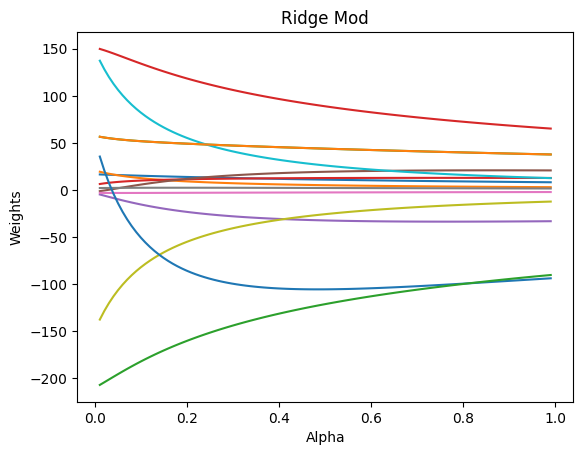

income                          16.731040
age                             20.714053
schoolYears                     57.543285
race_asian                       5.659278
race_black                      -3.313577
race_hispanic                   -1.672174
race_other                      -2.867291
race_white                       2.193764
sex_female                    -165.825386
sex_male                       130.408977
sex_other                       35.416409
Asian_Woman_HigherEducation     57.543285
black_women                   -209.668530
hispanic_men                   151.117036
dtype: float64
income                          16.729555
age                             20.707849
schoolYears                     57.498798
race_asian                       5.701448
race_black                      -3.457421
race_hispanic                   -1.574629
race_other                      -2.864348
race_white                       2.194950
sex_female                    -165.406668
sex_male           

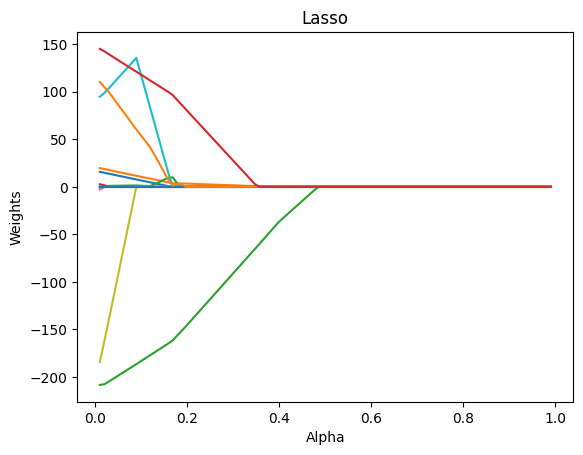

In [53]:
#Nedim Hodzic
#T54-574 - Exercise 06

# We’ll be using the lab07_customers.csv data set for this lab. The data set covers the demographic 
# characteristics of some customers and the amount they spent over the past year at an online retailer. 
# We’ll pick up where lab 07 left off. For this exercise it is recommended to use the sklearn packages for 
# linear regression, ridge, and lasso.  
import pandas as pd 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1.Build a linear regression with all the dependant variables and the interactions from the lab 
df1 = pd.read_csv('/Users/nedim/Downloads/lab07_customers.csv')
#transform income w/natural log
df1['income'] = np.log(df1['income'])
#dummy variables
df2 = pd.get_dummies(df1)
df2['hispanic_men'] = df2['race_hispanic'] * df2['sex_male']
df2['black_women'] = df2['race_black'] * df2['sex_female']
df2['Asian_Woman_HigherEducation'] = df2['race_asian'] * df2['sex_female'] * df2['schoolYears']

x = df2[['income', 'age', 'schoolYears', 'race_asian', 'race_black', 'race_hispanic', 'race_other', 'race_white', 
'sex_female', 'sex_male', 'sex_other', 'Asian_Woman_HigherEducation', 'black_women', 'hispanic_men']]
y = df2['spend']

LinearRegression_model=LinearRegression().fit(x,y)
print(LinearRegression_model)

# 2. Ridge 
#Build ridge models with various values for alpha. Create a chart showing how the coefficients 
#change with alpha values 

alphas = np.linspace(0.01, 0.99, 100)
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Ridge Mod')
plt.show()

# 3. Lasso 
# Build lasso models with various values for alpha. Create a chart showing how the coefficients 
# change with alpha values 
lasso = Lasso(normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x, y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Lasso')

# 4.Compare the coefficients from linear regression, ridge, and lasso (select an alpha value using 
# your chart) 
#Set the display format to be scientific for ease of analysis
rcv = RidgeCV(alphas=alphas)
rcv.fit(x, y)
lcv = LassoCV(alphas=alphas)
lcv.fit(x,y)
ridge_ = Ridge(alpha=rcv.alpha_)
ridge_.fit(x,y)
lasso_ = Lasso(alpha=lcv.alpha_)
lasso_.fit(x,y)

pd.reset_option('display.float_format')
print(pd.Series(LinearRegression_model.coef_, index = x.columns))
print(pd.Series(ridge_.coef_, index=x.columns))
print(pd.Series(lasso_.coef_, index=x.columns))

# Linear Regression Model Coefficients
# income                          16.731040
# age                             20.714053
# schoolYears                     57.543285
# race_asian                       5.659278
# race_black                      -3.313577
# race_hispanic                   -1.672174
# race_other                      -2.867291
# race_white                       2.193764
# sex_female                    -165.825386
# sex_male                       130.408977
# sex_other                       35.416409
# Asian_Woman_HigherEducation     57.543285
# black_women                   -209.668530
# hispanic_men                   151.117036
# dtype: float64

# Ridge Coefficients
# income                          16.729558
# age                             20.707864
# schoolYears                     57.498908
# race_asian                       5.701344
# race_black                      -3.457065
# race_hispanic                   -1.574870
# race_other                      -2.864355
# race_white                       2.194947
# sex_female                    -165.407687
# sex_male                       130.761857
# sex_other                       34.645830
# Asian_Woman_HigherEducation     57.498908
# black_women                   -209.374036
# hispanic_men                   150.917541
# dtype: float64

#Lasso Coefficients
# income                          16.720866
# age                             20.716888
# schoolYears                      0.088312
# race_asian                       7.188481
# race_black                      -1.785381
# race_hispanic                    0.000000
# race_other                      -1.251405
# race_white                       3.705736
# sex_female                    -255.966103
# sex_male                        40.338771
# sex_other                      -46.333815
# Asian_Woman_HigherEducation    114.723934
# black_women                   -209.467024
# hispanic_men                   150.817385
# dtype: float64

# 5. Compare the R2 from lr, ridge, and lasso 
R2_linear_regression = LinearRegression_model.score(x,y)
R2_lasso = ridge_.score(x,y)
R2_ridge = lasso_.score(x,y)
print('Linear Regression R^2 = ', R2_linear_regression)
print('Lasso R^2 = ', R2_lasso)
print('Ridge R^2 = ', R2_ridge)

# Linear Regression R^2 =  0.8643841768850986
# Lasso R^2 =  0.8643837803700897
# Ridge R^2 =  0.8643773400885509

# 6. Which model would you choose, and why? 
# I would choose lasso due to having a small number of significant values in our dataset.
# Lasso also generates coefficients which are overall larger than the other models

# 7. Interpret your chosen model
# The lasso model has a R^2 of 0.86438378, which means that it explains 86.43% of the variance. 
# The model also tells us that the weight of hispanic_men is at 0, along with a high Asian_Women_Higher_Education coefficiant
# This tells us that the values are significant
